<a href="https://colab.research.google.com/github/georgiaceline/Financial-Literacy-with-Chase/blob/main/Financial_Literacy_with_Your_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hi readers! Welcome to my very first banking themed program! I’m using simulated datasets and variables to practice my data science skills with Python.
### Today, I explored a fun question: "Which features of the a banking app are most effective at building financial literacy?"

To start, I want to make sure I'm able to successfully download and import my dataset from Kaggle. Shoutout to Janio Bachmann for the awesome dataset!

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bank-marketing-dataset' dataset.
Path to dataset files: /kaggle/input/bank-marketing-dataset


In [ ]:
!pip install kaggle

Let's also not forget to import needed modules and scan our imported data.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


At this point, I realized that I'm going to drop the "contact" and "poutcome" columns since they will not be relevant to this practice.

In [ ]:
df_clean = df.drop(columns=['contact', 'poutcome'])
print(df_clean.columns)
df_clean.head()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,yes


Here is my attempt to simulate a banking app features and their usage. I also wanted to ensure that there's a bit real life probabilities, and I utilized the random module to ensure this.

In [ ]:
np.random.seed(42)

df_clean['uses_budget_tool'] = np.where(df_clean['balance'] < df_clean['balance'].median(),
                                        np.random.choice([1,0], size=len(df_clean), p=[0.7,0.3]),
                                        np.random.choice([1,0], size=len(df_clean), p=[0.4,0.6]))

df_clean['uses_credit_tracker'] = np.where((df_clean['loan'] == 'yes') | (df_clean['education'] == 'tertiary'),
                                           np.random.choice([1,0], size=len(df_clean), p=[0.7,0.3]),
                                           np.random.choice([1,0], size=len(df_clean), p=[0.4,0.6]))

df_clean['uses_spending_alerts'] = np.where(df_clean['age'] > 40,
                                            np.random.choice([1,0], size=len(df_clean), p=[0.6,0.4]),
                                            np.random.choice([1,0], size=len(df_clean), p=[0.4,0.6]))

df_clean['uses_savings_goals'] = np.where(df_clean['balance'] > 0,
                                          np.random.choice([1,0], size=len(df_clean), p=[0.6,0.4]),
                                          np.random.choice([1,0], size=len(df_clean), p=[0.3,0.7]))

df_clean['uses_fin_ed_content'] = np.where(df_clean['education'] == 'tertiary',
                                           np.random.choice([1,0], size=len(df_clean), p=[0.6,0.4]),
                                           np.random.choice([1,0], size=len(df_clean), p=[0.3,0.7]))

df_clean['app_engagement_score'] = df_clean[['uses_budget_tool','uses_credit_tracker',
                                             'uses_spending_alerts','uses_savings_goals',
                                             'uses_fin_ed_content']].sum(axis=1) + np.random.normal(0,0.2,len(df_clean))

Next, I wanted to make sure the education labels are more digestible for Python, so I changed the education levels to numbers instead. In addition to that, I wanted to normalize any extreme numerical values in the "balance" column.

Finally, I calculated the financial literacy score.

In [ ]:
education_map = {'primary':1, 'secondary':2, 'tertiary':3, 'unknown':2}
df_clean['education_num'] = df_clean['education'].map(education_map)

# Normalize balance
df_clean['balance_norm'] = (df_clean['balance'] - df_clean['balance'].min()) / (df_clean['balance'].max() - df_clean['balance'].min())

# Financial literacy score = weighted sum of education + normalized balance
df_clean['financial_literacy_score'] = 0.5 * df_clean['education_num'] + 0.5 * df_clean['balance_norm']

I wanted to visualize these numbers in two ways. First, I want to look at the correlation between the banking app features with people's financial literacy using a heatmap. Second, by using a bar chart.

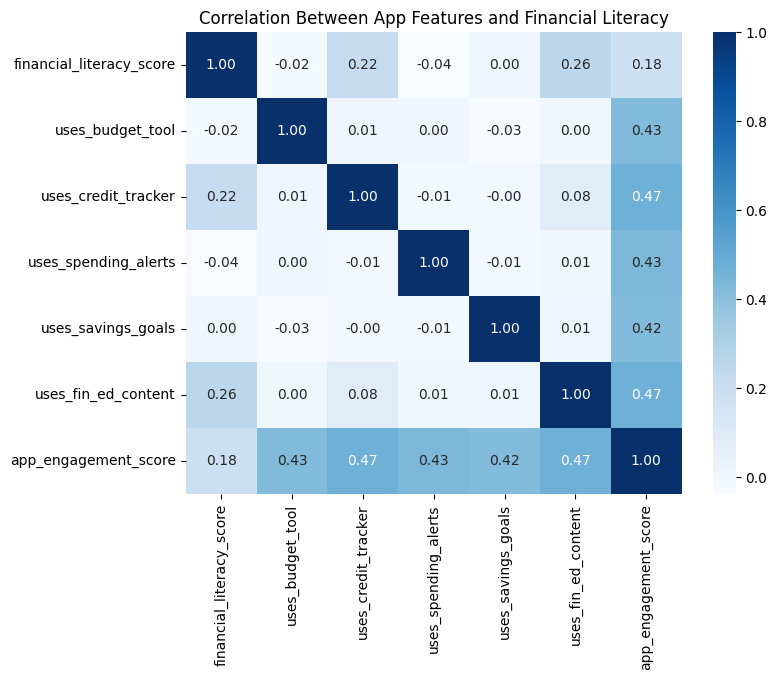

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_vars = ['financial_literacy_score','uses_budget_tool','uses_credit_tracker',
             'uses_spending_alerts','uses_savings_goals','uses_fin_ed_content','app_engagement_score']

plt.figure(figsize=(8,6))
sns.heatmap(df_clean[corr_vars].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Between App Features and Financial Literacy')
plt.show()

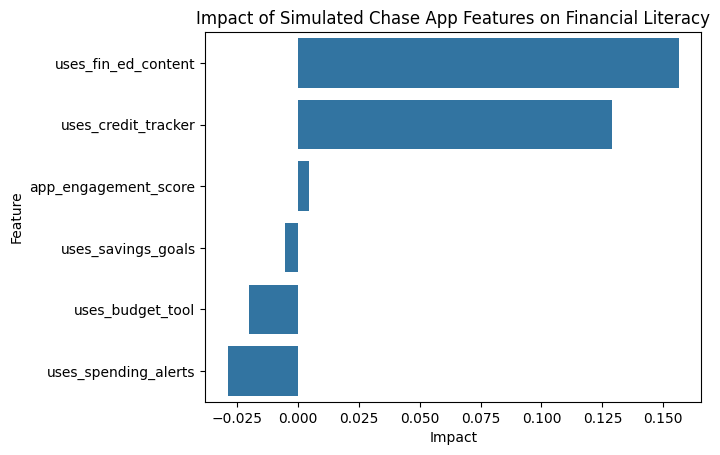

In [ ]:
from sklearn.linear_model import LinearRegression

X = df_clean[['uses_budget_tool','uses_credit_tracker','uses_spending_alerts',
        'uses_savings_goals','uses_fin_ed_content','app_engagement_score']]
y = df_clean['financial_literacy_score']

model = LinearRegression().fit(X, y)

importance = pd.DataFrame({'Feature': X.columns, 'Impact': model.coef_}).sort_values('Impact', ascending=False)

sns.barplot(x='Impact', y='Feature', data=importance)
plt.title('Impact of Simulated Chase App Features on Financial Literacy')
plt.show()

We can see that the financial education content section in the app has the highest impact in increasing people's financial literacy.